In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uuid
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier

In [15]:
df = pd.read_csv("fraud_data.csv")

In [16]:
df.shape

(6362620, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  transaction_id  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 582.5+ MB


In [6]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0        0               0   
1  M2044282225             0.0             0.0        0               0   
2   C553264065             0.0             0.0        1               0   
3    C38997010         21182.0             0.0        1               0   
4  M1230701703             0.0             0.0        0               0   

                         transaction_id  
0  e229deee-1ffc-4c39-9ea6-046cb66a274a  
1  ce5d9129-d037-4621-94f3-acc688c9f80d  
2  eb1beb60-0448-4290-ba83-8043b1a65036  
3  c0f30e78-3412-40c5-9d9a-95f3442fe85c  
4  7f79fb55-22e8-4279-bde3-5d5577d126cc

In [7]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: ylabel='count'>

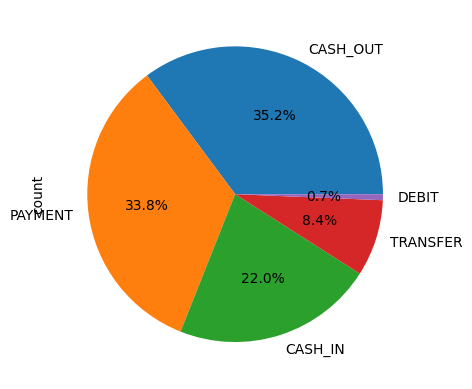

In [8]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [9]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
transaction_id    0
dtype: int64

In [17]:
df = df[["amount", "oldbalanceOrg","newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]]

In [18]:
df.shape

(6362620, 6)

In [21]:
X = df.drop("isFraud", axis = 1)
y = df['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [25]:
# Undersample majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [33]:
X_resampled.shape, y_resampled.shape

((13140, 5), (13140,))

# Training Models

## Decision Tree

In [34]:
# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


[[1255047   15834]
 [     10    1633]]
              precision    recall  f1-score   support

           0     1.0000    0.9875    0.9937   1270881
           1     0.0935    0.9939    0.1709      1643

    accuracy                         0.9875   1272524
   macro avg     0.5467    0.9907    0.5823   1272524
weighted avg     0.9988    0.9875    0.9927   1272524



In [ ]:
import joblib

joblib.dump(model, "decision_tree.pkl")

['decision_tree.pkl']